#### `Note: Understanding the Problem`
Customer churn prediction involves identifying customers likely to stop using a service. Businesses use this information to take proactive measures to retain customers. We’ll use a public dataset and build a deep learning model to predict churn.

Customer churn is the percentage of customers who stop using a business's products or services over a specific period of time

## `Import Libraries`

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
import pickle
import os

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Deep Learning Models
import tensorflow as tf
from tensorflow.keras.models import Sequential          # Sequential: A simple way to build a model layer by layer (like stacking building blocks).
from tensorflow.keras.layers import Dense               # Dense: A fully connected layer where each neuron is connected to every neuron in the previous and next layers.
from tensorflow.keras.layers import Dropout             # Dropout: A technique to prevent the model from overfitting by randomly “turning off” some neurons during training.

## `Reading Dataset`

In [2]:
# Load the dataset
data = pd.read_csv('telco_customer_churn.csv')

# Display the first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,C00001,Male,1,Yes,No,7,No,Yes,No,Yes,...,No internet service,Yes,Yes,No internet service,Month-to-month,Yes,Bank transfer (automatic),68.82,6461.38,Yes
1,C00002,Female,0,No,No,35,No,No phone service,Fiber optic,No internet service,...,No,No,No,No,Two year,No,Mailed check,64.96,3568.16,Yes
2,C00003,Male,0,No,No,55,Yes,No phone service,No,Yes,...,No internet service,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),118.50,7458.33,No
3,C00004,Male,0,No,No,14,No,No phone service,Fiber optic,Yes,...,Yes,No,No internet service,No,Two year,No,Mailed check,67.85,3749.70,Yes
4,C00005,Male,0,No,Yes,10,No,No phone service,No,Yes,...,No internet service,Yes,No,Yes,Month-to-month,No,Mailed check,36.18,6004.67,No


In [3]:
# Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

## `Preprocessing Dataset`

In [5]:
# Drop irrelevant columns (The colums isn't required further in the analysis)
data = data.drop(columns=['customerID'])

In [6]:
# Convert categorical columns to numerical
label_encoders = {} # This is a dictionary where the encoding will be stored for each column. So that if/when required we can inverse transform the data using the stored encoders. 
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [7]:
# Encode target column
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [9]:
# Split into features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## `Deep Learning Model Build`

`Note to Self:` What is Happening Here? - 
You are building a neural network model for binary classification (predicting if something belongs to one of two classes, like “Yes” or “No”) using TensorFlow and Keras. 

In [10]:
# What it does: Starts an empty model where you’ll add layers one by one.
# Think of it like this: You’re building a sandwich and starting with an empty plate.

# Initialize the model
model = Sequential()

In [11]:
# Input layer
model.add(Dense(100,                             # Dense(64): Creates a layer with 64 neurons.
                input_dim=X_train.shape[1],     # input_dim=X_train.shape[1]: Tells the model how many input features there are (the number of columns in your dataset). Each feature will have its own “neuron.”
                activation='relu'))             # activation='relu': Applies the ReLU (Rectified Linear Unit) activation function to each neuron. What it does: Keeps only positive values (turns negatives into 0), which helps the model learn complex patterns.

/Users/sakshamarora/.pyenv/versions/3.11.6/envs/AI_UseCase/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Hidden layers (Hidden layer role: Think of it as the brain solving smaller problems to understand the big picture.)
model.add(Dense(64, activation='relu')) # Dense(32): Adds another layer with 32 neurons. These neurons process information from the previous layer.

# Drop Neurons (This prevents the model from memorizing the data (overfitting) and helps it generalize better to unseen data.)
model.add(Dropout(0.3))  # Dropout for regularization. Dropout(0.3): During training, 30% of neurons in this layer are randomly “turned off” for each training step.

In [13]:
# Output layer
model.add(Dense(1,                      # # Dense(1): The output layer has 1 neuron because this is a binary classification problem (predicting “Yes” or “No”).
                activation='sigmoid'))  # activation='sigmoid': Outputs a value between 0 and 1. This represents the probability of belonging to one class (e.g., “Yes”).

In [14]:
# Compile the model
model.compile(loss='binary_crossentropy', # Measures how far off the predictions are for binary classification problems. Lower loss = better model performance.
              optimizer='adam',           # A method to update the model’s weights to reduce the loss. Think of it as the “coach” guiding the model to improve after every mistake. 
              metrics=['accuracy'])       # Tracks how often the model predicts correctly during training.

In [15]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,529 (33.32 KB)

 Trainable params: 8,529 (33.32 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=25,                         # epochs: The number of iterations over the entire dataset.
                                      batch_size=32,                     # batch_size: The number of samples per gradient update.
                                      validation_data=(X_test, y_test))  # validation_data: Evaluates the model on test data after each epoch.

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4858 - loss: 0.7186 - val_accuracy: 0.5250 - val_loss: 0.6896
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5040 - loss: 0.6973 - val_accuracy: 0.5200 - val_loss: 0.6881
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5309 - loss: 0.6879 - val_accuracy: 0.5550 - val_loss: 0.6889
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5838 - loss: 0.6746 - val_accuracy: 0.5300 - val_loss: 0.6926
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.5738 - loss: 0.6768 - val_accuracy: 0.5150 - val_loss: 0.6913
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.6316 - loss: 0.6615 - val_accuracy: 0.5200 - val_loss: 0.6935
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.6090 - loss: 0.6636 - val_accuracy: 0.5150 - val_loss: 0.6936
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.6323 - loss: 0.6488 - val_accuracy: 0.5100 - v

In [22]:
prediction = model.predict(X_test)[0][0]
prediction

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step


np.float32(0.42432117)

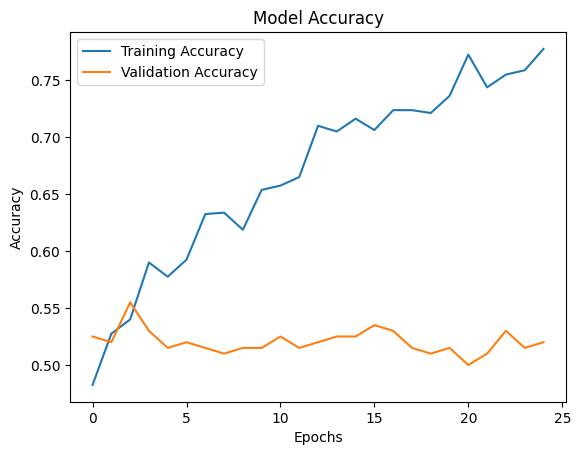

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4958 - loss: 0.7643  
Test Accuracy: 0.52


In [17]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

In [18]:
os.chdir(r'/Users/sakshamarora/Documents/3. Work Stuff/Python_3.11/10. GitHub Project (Career Focused)/2. Customer Churn Prediction Streamlit Application')

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [19]:
# Save the trained model
model.save('customer_churn_model.h5')
# model.save('my_model.keras') : New way to save the model.